# Project overview
The goal of this project is to perform a exploratory data analasys on NBA player statistics data and gain insight into players performance trends and patterns.
    

# Libraries and imports
1. Matplotlib for vizualization
2. Seaborn 
3. Pandas for data import


Data set is from kaggle
https://www.kaggle.com/datasets/drgilermo/nba-players-stats-20142015

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [4]:
nba = pd.read_csv("players_stats.csv")

# Data - exploring the posibilities

In [6]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          490 non-null    object 
 1   Games Played  490 non-null    int64  
 2   MIN           490 non-null    int64  
 3   PTS           490 non-null    int64  
 4   FGM           490 non-null    int64  
 5   FGA           490 non-null    int64  
 6   FG%           490 non-null    float64
 7   3PM           490 non-null    int64  
 8   3PA           490 non-null    int64  
 9   3P%           490 non-null    float64
 10  FTM           490 non-null    int64  
 11  FTA           490 non-null    int64  
 12  FT%           490 non-null    float64
 13  OREB          490 non-null    int64  
 14  DREB          490 non-null    int64  
 15  REB           490 non-null    int64  
 16  AST           490 non-null    int64  
 17  STL           490 non-null    int64  
 18  BLK           490 non-null    

# Distribution 
The bellcurve shows alot in the next graph, but the interesting thing is there are almost the same number of players with 3P% higher then 43% let's say, and FG% above 55%. We could argue, and we will find out later, that those are the same players!

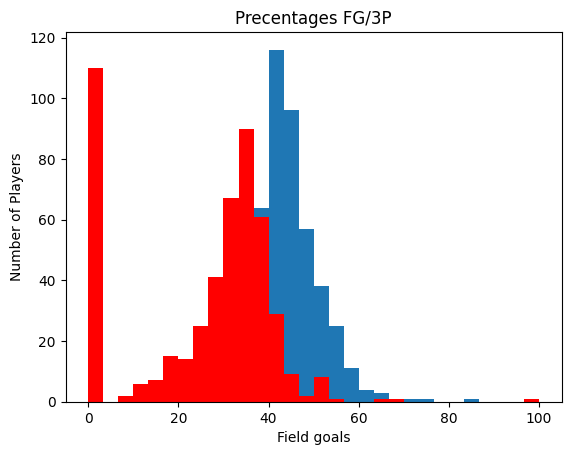

In [14]:
# Histogram of player points per game vs FGA
plt.hist(nba['FG%'], bins=30)
plt.hist(nba['3P%'], bins=30, color = "red")
plt.title('Precentages FG/3P')
plt.xlabel('Field goals')
plt.ylabel('Number of Players')
plt.show()

## How would a player hight effect the shooting precentages?
Shooting precentage is a one dimensional stat, you have to take in the amount of shooting, or attempts. Precentage is nothing without volume and repeatability.
We see a couple of outliers, who take alot of shots, and make quite a few of them.

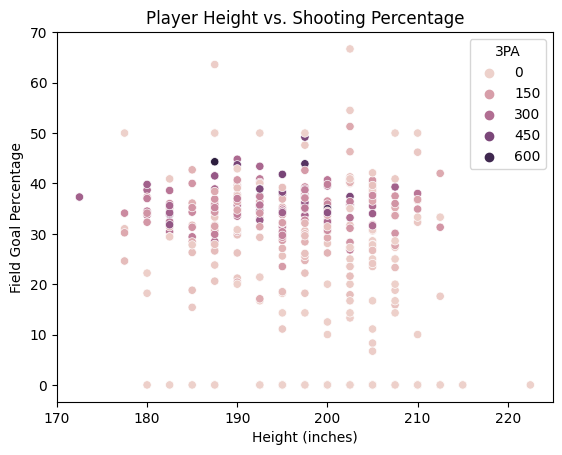

In [30]:
# Scatter plot of player height and shooting percentage
sns.scatterplot(x='Height', y='3P%', data=nba, hue='3PA')
plt.title('Player Height vs. Shooting Percentage')
plt.xlabel('Height (inches)')
plt.ylabel('Field Goal Percentage')
plt.show()


### Hustle

Shooting aside, there is one essential skill that, i believe, CAN be thought. And thats hustle.
Defining hustle is pretty loose, but a general energy level and willingness to execute and perform at a high level.
A stat clearly showing this are the number of offensive rebounds.

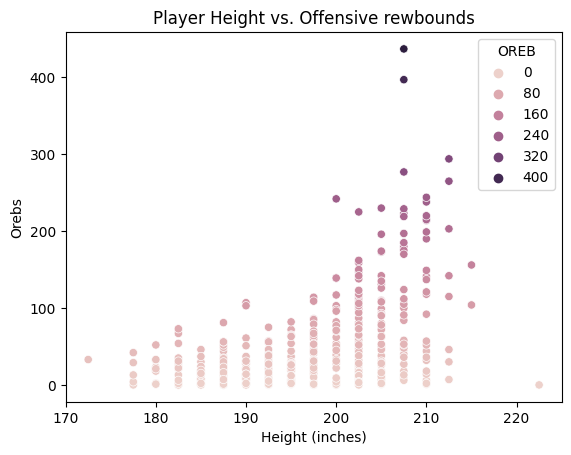

In [31]:
# Scatter plot of player offensive rebaund and hight comparisin
sns.scatterplot(x='Height', y='OREB', data=nba, hue='OREB')
plt.title('Player Height vs. Offensive rewbounds')
plt.xlabel('Height (inches)')
plt.ylabel('Orebs')
plt.show()

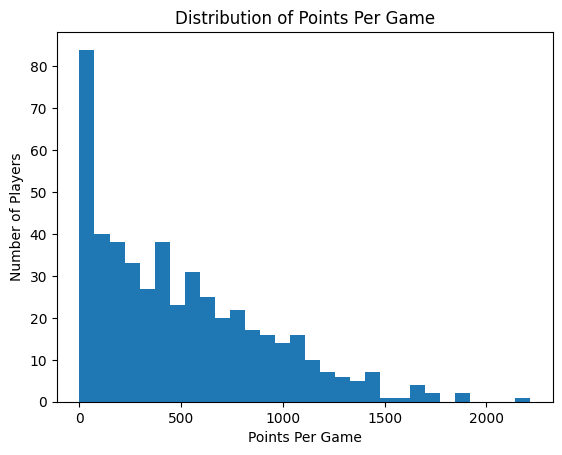

In [4]:
# Histogram of player points per game
plt.hist(nba['PTS'], bins=30)
plt.title('Distribution of Points Per Game')
plt.xlabel('Points Per Game')
plt.ylabel('Number of Players')
plt.show()



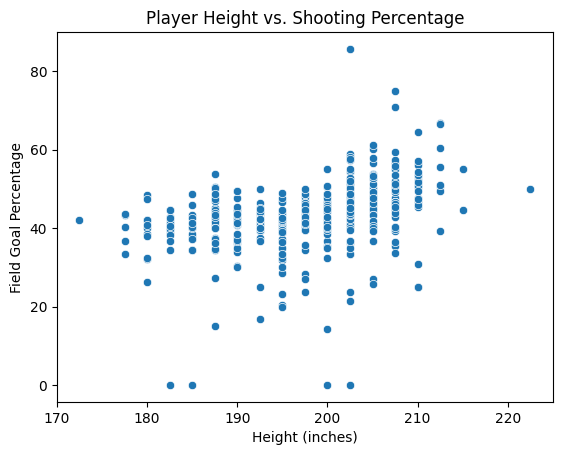

In [5]:
# Scatter plot of player height and shooting percentage
sns.scatterplot(x='Height', y='FG%', data=nba)
plt.title('Player Height vs. Shooting Percentage')
plt.xlabel('Height (inches)')
plt.ylabel('Field Goal Percentage')
plt.show()



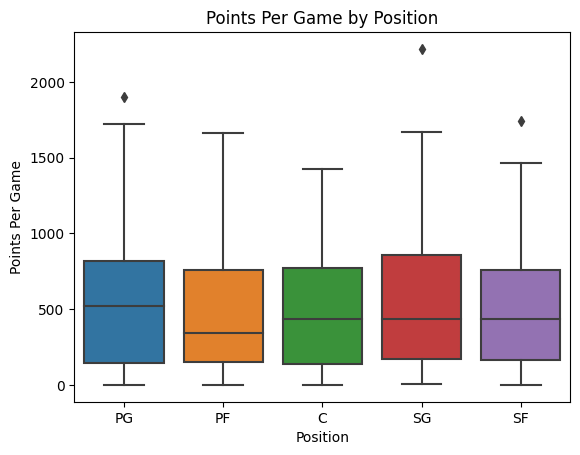

In [6]:
# Box plot of player points per game by position
sns.boxplot(x='Pos', y='PTS', data=nba)
plt.title('Points Per Game by Position')
plt.xlabel('Position')
plt.ylabel('Points Per Game')
plt.show()

# Lets go a step further
The next section will show us a comparision of points between centers, and point guards.
Woa woa woa, wait a minute.... I know what you are thinking, there are more point guards, then centers, point guards have huge usage rates... etc...
Thats why we are gonna find the difference between mean points per game.

In [32]:
from scipy.stats import ttest_ind, f_oneway
import statsmodels.api as sm



In [44]:
# Hypothesis testing for the difference in mean points per game between point guards and centers
pg_pts = nba[nba['Pos'] == 'PG']['PTS']
c_pts = nba[nba['Pos'] == 'C']['PTS']
t, p = ttest_ind(pg_pts, c_pts, equal_var=False)
if p < 0.05:
    print('There is a significant difference in mean points per game between point guards and centers.')
else:
    print('There is no significant difference in mean points per game between point guards and centers.')

print(f"the difference between PG points mean , and C points mean is: {p}")

There is no significant difference in mean points per game between point guards and centers.
the difference between PG points mean , and C points mean is: 0.4360452179748008


## But what does this mean ( get it?)
The mean is calculated like this X̄ = (Sum of values ÷ Number of values)


So difference beeing a  0.43 is saying that the Centers are contributing to the points, as much as the point Guards!!!

In [ ]:
pd.set_option('display.max_columns', None)
nba.head()

# What is this now?

This will be our little prediction, predicting the efficiency of players regarding the stats.
Simple, transparent and accurate.

R^2 on training set: 0.961
R^2 on test set: 0.960

The predictions were right on point, the stats DO reflect on efficiency ratings!!!
Humor aside, this model took only the positive attributes and fited the model.


In [37]:
# Regression analysis to predict player efficiency rating based on player attributes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = nba[['MIN', 'FG%', '3P%', 'FT%', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF']]
y = nba['EFF']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression().fit(X_train, y_train)
r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)
print(f'R^2 on training set: {r2_train:.3f}')
print(f'R^2 on test set: {r2_test:.3f}')

R^2 on training set: 0.961
R^2 on test set: 0.960
